In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
import numpy as np
from numpy.random import uniform as uf
import matplotlib.pyplot as plt
#?matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [4]:
def gen_datacloud(x0, y0, radius, N):

    r = radius * np.random.rand(N)
    theta = 360.0 * np.random.rand(N)

    x = r * np.sin(theta)
    y = r * np.cos(theta)

    x += x0
    y += y0

    return x, y

In [5]:
N = 1000
rMax = 10

p1 = [uf(low=-3, high=10), uf(low=-3, high=10), uf(low=1, high=rMax)]

x1, y1 = gen_datacloud(p1[0], p1[1], p1[2], N)
cl1 = np.zeros(x1.shape)

p2 = [uf(low=-10, high=3), uf(low=-10, high=3), uf(low=1, high=rMax)]

x2, y2 = gen_datacloud(p2[0], p2[1], p2[2], N)
cl2 = np.ones(x2.shape)

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
cl = np.concatenate((cl1, cl2))

data = np.hstack((cl[:,None], xs[:,None], ys[:,None]))

In [6]:
xs.shape, ys.shape, cl.shape

((2000,), (2000,), (2000,))

In [7]:
data.shape

(2000, 3)

In [8]:
df = pd.DataFrame(data)
df.columns = ['class', 'x', 'y']
df = df.astype({'class': int})

df.head()

,class,x,y
0,0,4.689284,-2.007476
1,0,4.044300,-2.667337
2,0,1.881161,1.901214
3,0,6.629235,-1.756120
4,0,2.588176,0.120033


<AxesSubplot:xlabel='x', ylabel='y'>

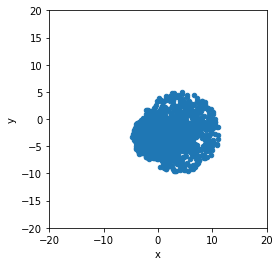

In [9]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-10-rMax, 10+rMax)
ax.set_ylim(-10-rMax, 10+rMax)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', ax = ax)

In [10]:
df = df.sample(frac=1) #randomise samples

In [11]:
clf = SVC(kernel='linear')

In [12]:
target = df.pop('class')
target

1483    1
233     0
1334    1
1077    1
424     0
       ..
1156    1
353     0
1011    1
198     0
1403    1
Name: class, Length: 2000, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1340, 2), (1340,), (660, 2), (660,))

In [15]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
score = clf.score(X_test, y_test)
score

0.85

In [18]:
import os

setName = "x"

os.mkdir(setName)

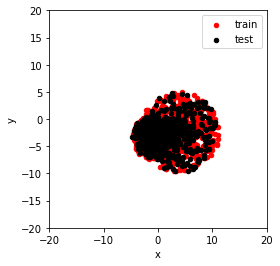

In [19]:
fig, ax = plt.subplots()

ax.set_xlim(-10-rMax, 10+rMax)
ax.set_ylim(-10-rMax, 10+rMax)
ax.set_aspect('equal')

X_train.plot(kind='scatter', x='x', y='y', ax = ax, color='r', label='train')
X_test.plot(kind='scatter', x='x', y='y', ax = ax, color='k', label='test')

plt.legend()

plt.savefig(f'{setName}\\vis.png')

In [20]:
initial_type = [('float_input', FloatTensorType([None, 2]))]
onx = convert_sklearn(clf, initial_types=initial_type, verbose=True)

[convert_sklearn] parse_sklearn_model
[convert_sklearn] convert_topology
[convert_operators] begin
[convert_operators] iteration 1 - n_vars=0 n_ops=1
[call_converter] call converter for 'SklearnSVC'.
[convert_operators] end iter: 1 - n_vars=4
[convert_operators] iteration 2 - n_vars=4 n_ops=1
[convert_operators] end iter: 2 - n_vars=4
[convert_operators] end.
[_update_domain_version] +opset 0: name='', version=9
[_update_domain_version] +opset 1: name='ai.onnx.ml', version=1
[convert_sklearn] end


In [ ]:
with open(f"{setName}\\svc_clouds.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
with open(f"{setName}\\svc_clouds_score={score:.4f}.csv", "w") as f:
    f.write("x_center, y_center, r\n")
    f.write(str(p1)[1:-2] + "\n")
    f.write(str(p2)[1:-2])